### 1.Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### 2.Read the Training Data

In [2]:
file_path = r"D:\machine learning projects\flightproject\flight price sagemaker\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-15,Delhi,Cochin,11:25:00,01:30:00,845,1.0,No Info,5883
1,Jet Airways,2019-06-09,Delhi,Cochin,22:50:00,04:25:00,335,1.0,In-flight meal not included,10262
2,Indigo,2019-03-15,Delhi,Cochin,14:30:00,17:35:00,185,0.0,No Info,5895
3,Indigo,2019-05-06,Banglore,Delhi,23:30:00,02:20:00,170,0.0,No Info,4077
4,Jet Airways,2019-04-01,Kolkata,Banglore,08:25:00,18:15:00,590,1.0,In-flight meal not included,7064
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-04-01,Kolkata,Banglore,11:30:00,14:05:00,155,0.0,No Info,4174
636,Air India,2019-05-06,Kolkata,Banglore,09:50:00,23:15:00,805,2.0,No Info,14120
637,Jet Airways,2019-05-06,Kolkata,Banglore,08:25:00,18:15:00,590,1.0,In-flight meal not included,10844
638,Jet Airways,2019-06-09,Delhi,Cochin,14:35:00,04:25:00,830,2.0,No Info,13376


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],format='mixed')
    for col in ['date_of_journey','dep_time','arrival_time']    
})

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-15,Delhi,Cochin,2024-05-02 11:25:00,2024-05-02 01:30:00,845,1.0,No Info,5883
1,Jet Airways,2019-06-09,Delhi,Cochin,2024-05-02 22:50:00,2024-05-02 04:25:00,335,1.0,In-flight meal not included,10262
2,Indigo,2019-03-15,Delhi,Cochin,2024-05-02 14:30:00,2024-05-02 17:35:00,185,0.0,No Info,5895
3,Indigo,2019-05-06,Banglore,Delhi,2024-05-02 23:30:00,2024-05-02 02:20:00,170,0.0,No Info,4077
4,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-02 08:25:00,2024-05-02 18:15:00,590,1.0,In-flight meal not included,7064
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-04-01,Kolkata,Banglore,2024-05-02 11:30:00,2024-05-02 14:05:00,155,0.0,No Info,4174
636,Air India,2019-05-06,Kolkata,Banglore,2024-05-02 09:50:00,2024-05-02 23:15:00,805,2.0,No Info,14120
637,Jet Airways,2019-05-06,Kolkata,Banglore,2024-05-02 08:25:00,2024-05-02 18:15:00,590,1.0,In-flight meal not included,10844
638,Jet Airways,2019-06-09,Delhi,Cochin,2024-05-02 14:35:00,2024-05-02 04:25:00,830,2.0,No Info,13376


### 3.HIgh-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,641.148438,0.784375,8946.751562
std,515.160809,0.652722,4470.912229
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5117.000000
50%,507.500000,1.000000,8266.000000
75%,930.000000,1.000000,12249.750000
max,2345.000000,3.000000,26890.000000


In [8]:
( 
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,225,274,274,341.0,497


## 4.High-level Analysis of Missing Value

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5.High-level Analysis of Outlier

In [10]:
forest = IsolationForest(n_estimators=10,random_state=42)

In [11]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                .drop(columns='price')
                                .select_dtypes(include='number')))
    .query('outlier==-1')
#     .duration
#     .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Indigo,2019-03-15,Delhi,Cochin,2024-05-02 14:30:00,2024-05-02 17:35:00,185,0.0,No Info,5895,-1
6,Air India,2019-03-01,Banglore,New Delhi,2024-05-02 11:05:00,2024-05-02 22:10:00,665,2.0,Change airports,13576,-1
8,Air India,2019-06-24,Delhi,Cochin,2024-05-02 19:45:00,2024-05-02 19:15:00,1410,2.0,No Info,9443,-1
10,Jet Airways,2019-06-27,Delhi,Cochin,2024-05-02 20:55:00,2024-05-02 19:00:00,1325,1.0,In-flight meal not included,10262,-1
11,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-02 09:35:00,2024-05-02 09:45:00,1450,1.0,No Info,12692,-1
...,...,...,...,...,...,...,...,...,...,...,...
622,Jet Airways,2019-06-15,Mumbai,Hyderabad,2024-05-02 07:05:00,2024-05-02 08:30:00,85,0.0,In-flight meal not included,4050,-1
630,Jet Airways,2019-03-18,Mumbai,Hyderabad,2024-05-02 19:35:00,2024-05-02 21:05:00,90,0.0,In-flight meal not included,2071,-1
631,Jet Airways,2019-06-03,Delhi,Cochin,2024-05-02 20:55:00,2024-05-02 19:00:00,1325,1.0,No Info,14714,-1
636,Air India,2019-05-06,Kolkata,Banglore,2024-05-02 09:50:00,2024-05-02 23:15:00,805,2.0,No Info,14120,-1


### 6.Pair Plots

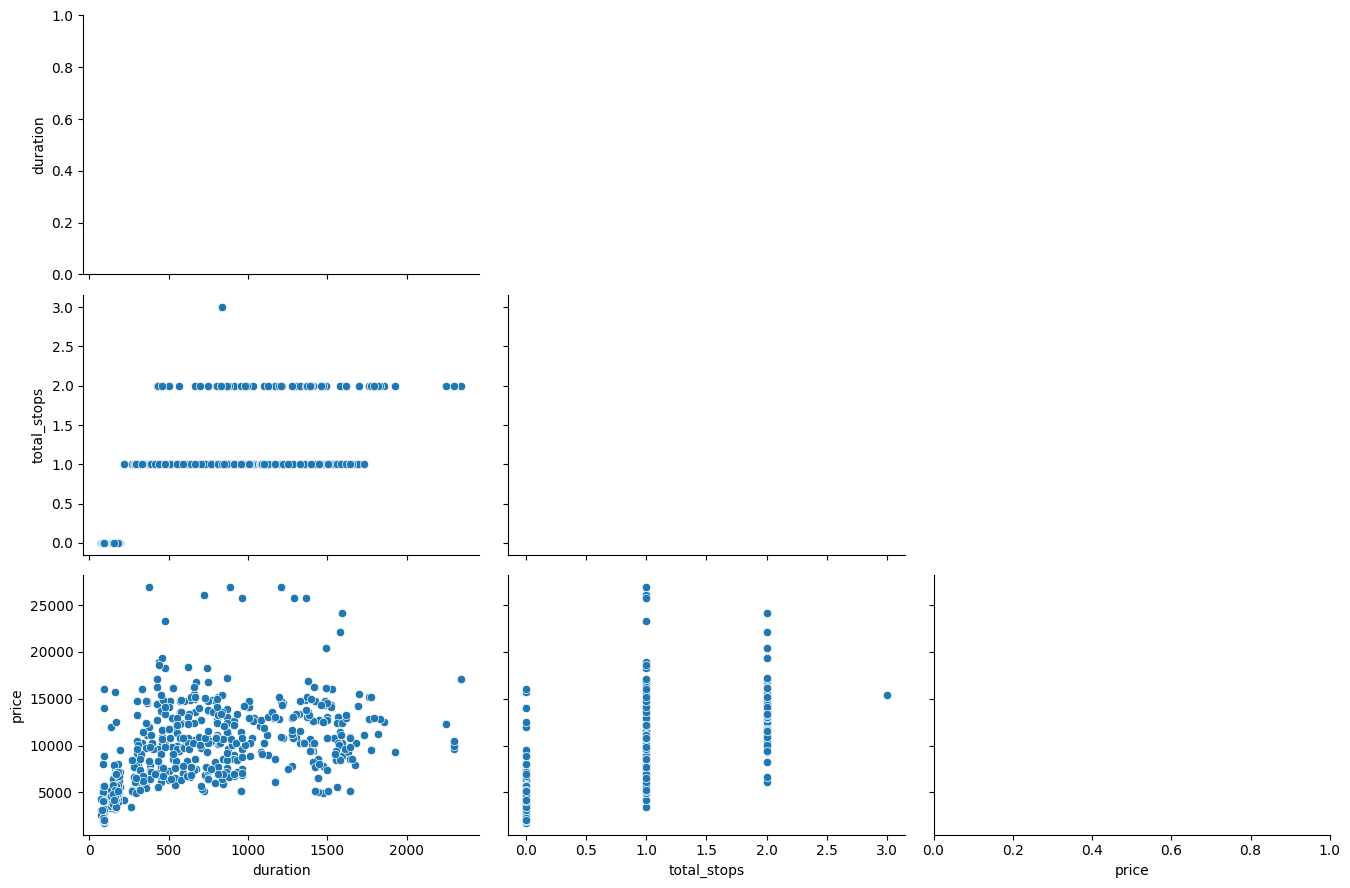

In [12]:
eda_helper_functions.pair_plots(train)

### 7.Cprrelation Analysis

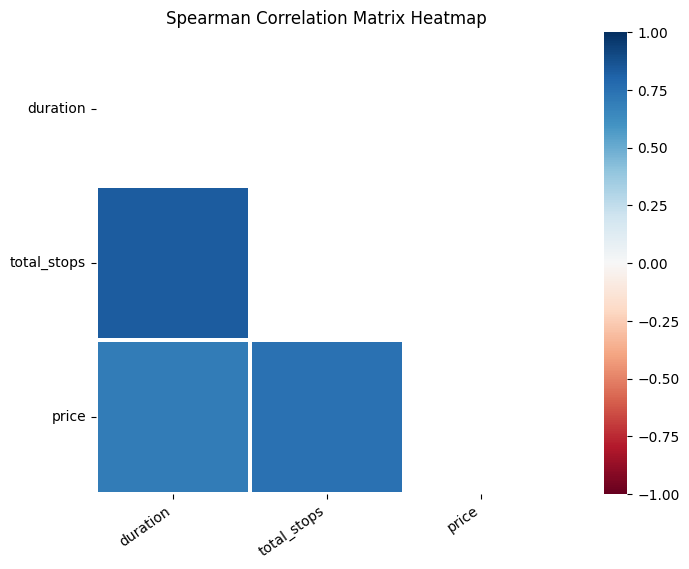

In [13]:
eda_helper_functions.correlation_heatmap(train)

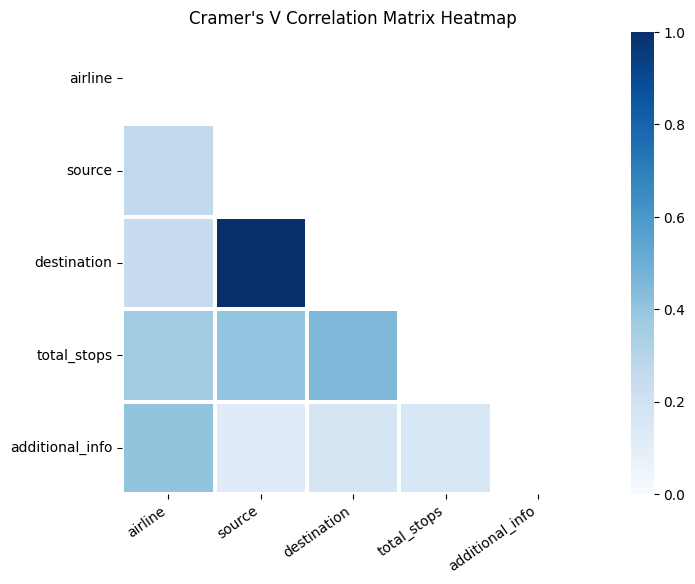

In [14]:
(train
 .assign(total_stops=train['total_stops'].astype(object))
 .pipe(eda_helper_functions.cramersV_heatmap)
)

### 8.Detailed Analysis

In [15]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [16]:
eda_helper_functions.cat_summary(train,'airline')

0           Indigo
1      Jet Airways
2           Indigo
3           Indigo
4      Jet Airways
          ...     
635         Indigo
636      Air India
637    Jet Airways
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,225


,count,percentage
category,,
Jet Airways,225,0.351562
Indigo,130,0.203125
Air India,107,0.167187
Multiple Carriers,72,0.112500
Spicejet,45,0.070312
Vistara,29,0.045312
Air Asia,19,0.029687
Goair,13,0.020313


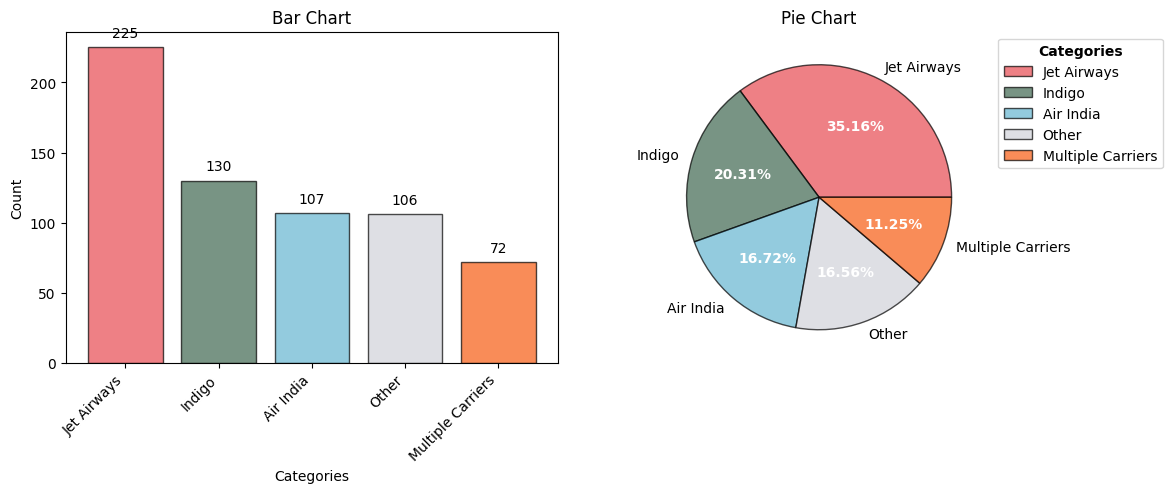

In [17]:
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False,k=4)

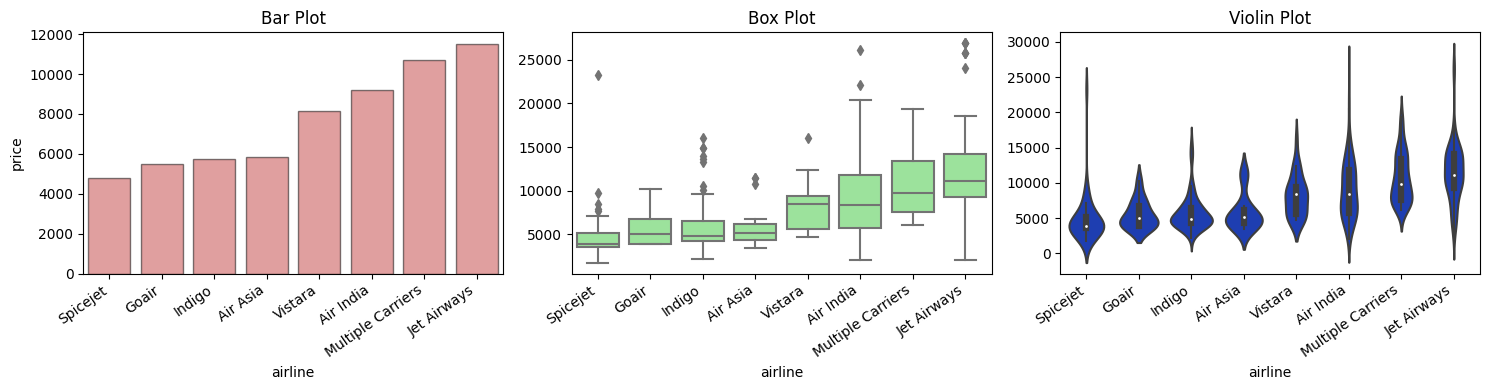

In [18]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

In [19]:
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 43.78568561629846
- p-value              : 1.8327081818184919e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 258.22029054572613
- p-value              : 4.925227189823438e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


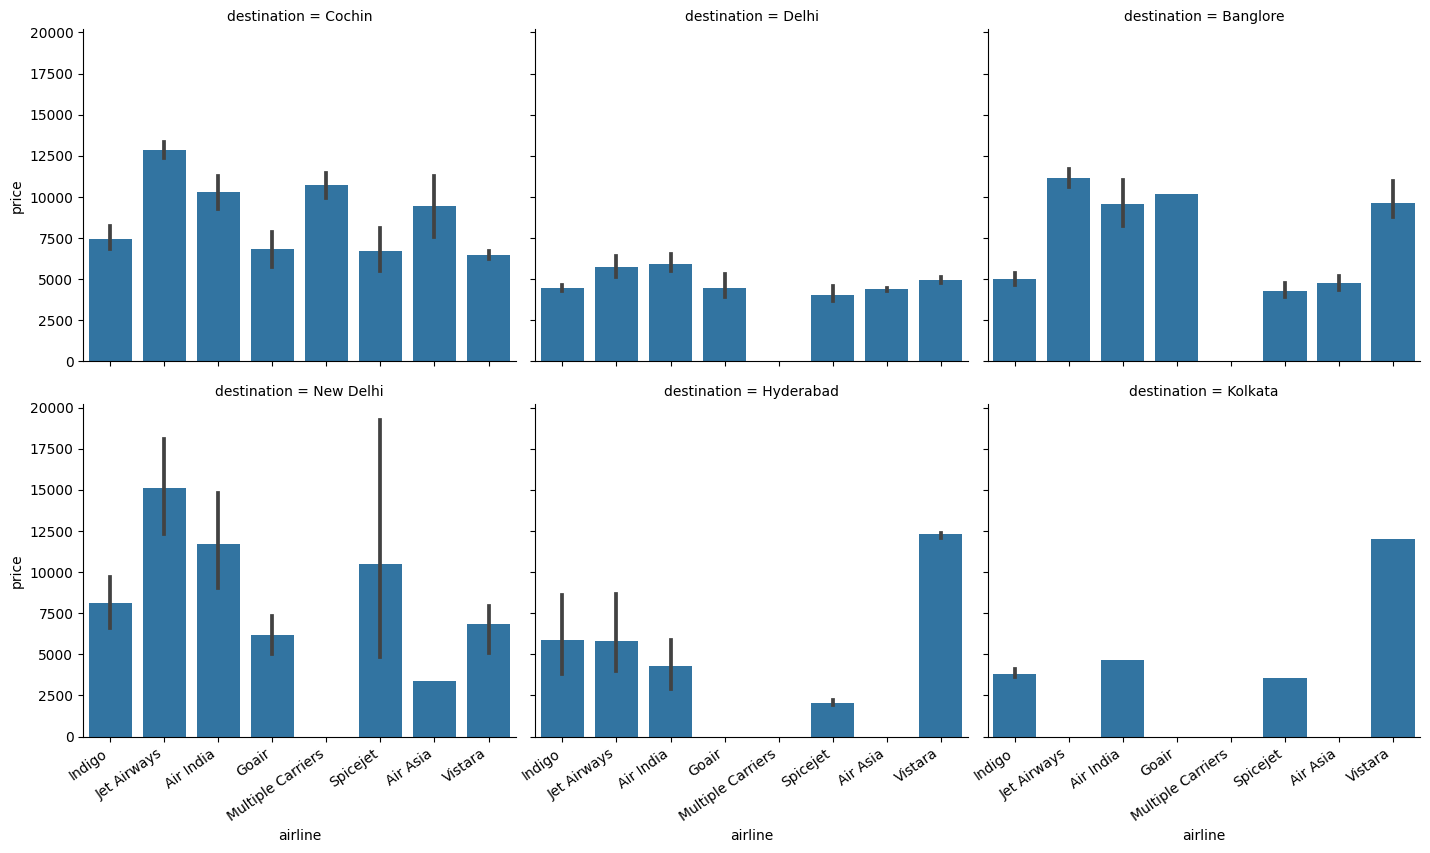

In [20]:
airline_grid = sns.FacetGrid(
    data = train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot,'airline','price',order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2date_of_journey

In [21]:
train.date_of_journey

0     2019-06-15
1     2019-06-09
2     2019-03-15
3     2019-05-06
4     2019-04-01
         ...    
635   2019-04-01
636   2019-05-06
637   2019-05-06
638   2019-06-09
639   2019-06-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

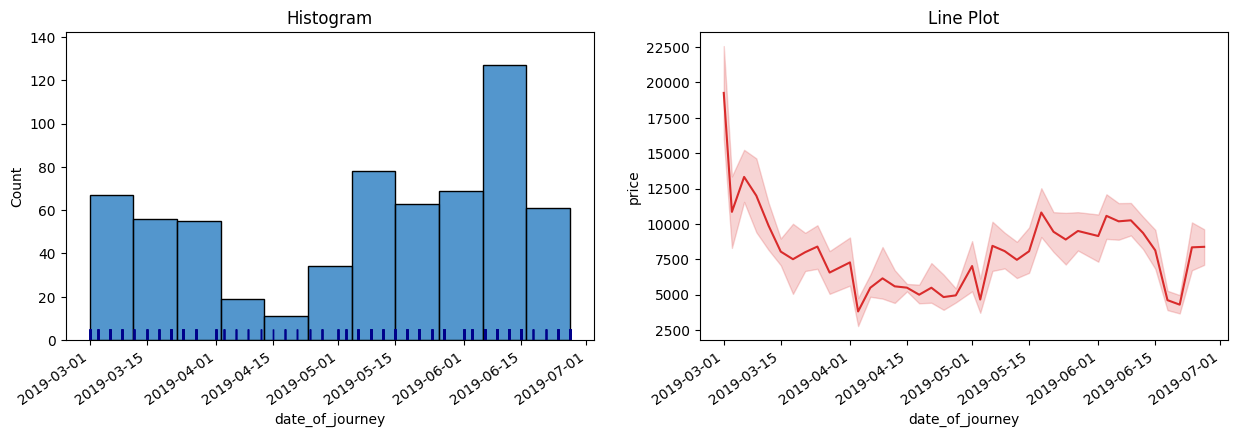

In [22]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

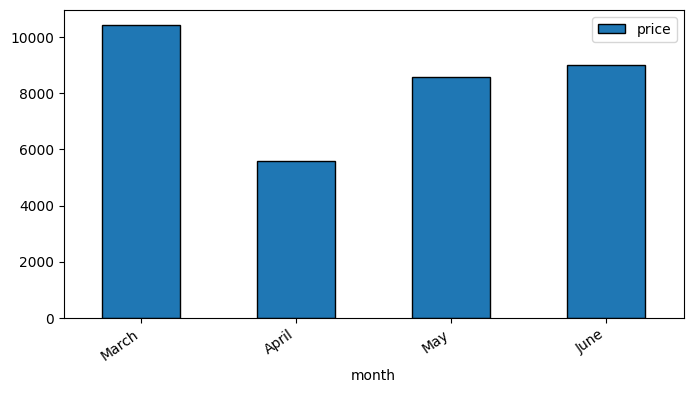

In [23]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

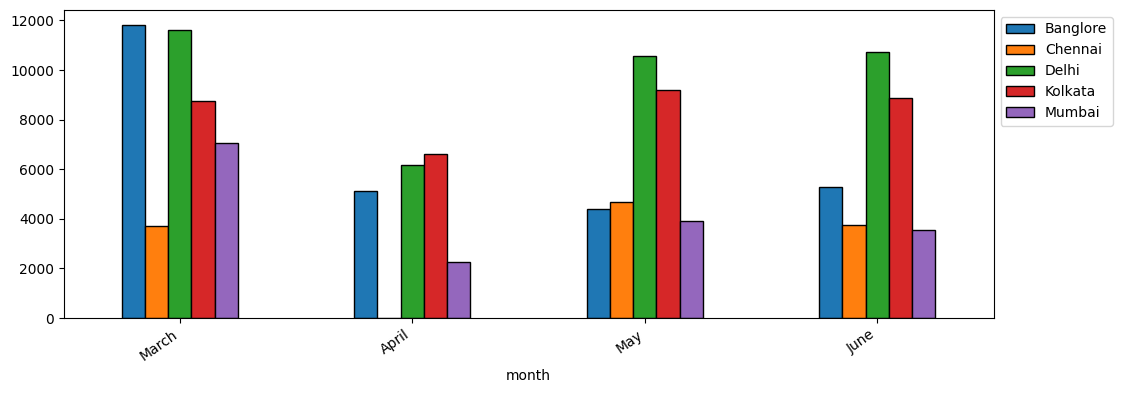

In [24]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey',freq='M'),'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(12,4),
        edgecolor='black'
    )
)

ax=plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [25]:
train.dep_time

0     2024-05-02 11:25:00
1     2024-05-02 22:50:00
2     2024-05-02 14:30:00
3     2024-05-02 23:30:00
4     2024-05-02 08:25:00
              ...        
635   2024-05-02 11:30:00
636   2024-05-02 09:50:00
637   2024-05-02 08:25:00
638   2024-05-02 14:35:00
639   2024-05-02 08:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

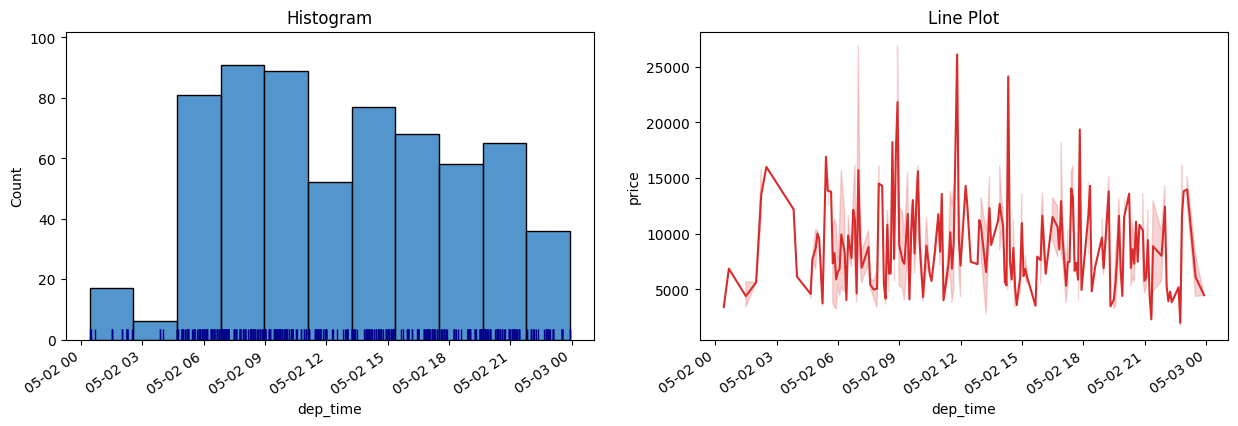

In [26]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

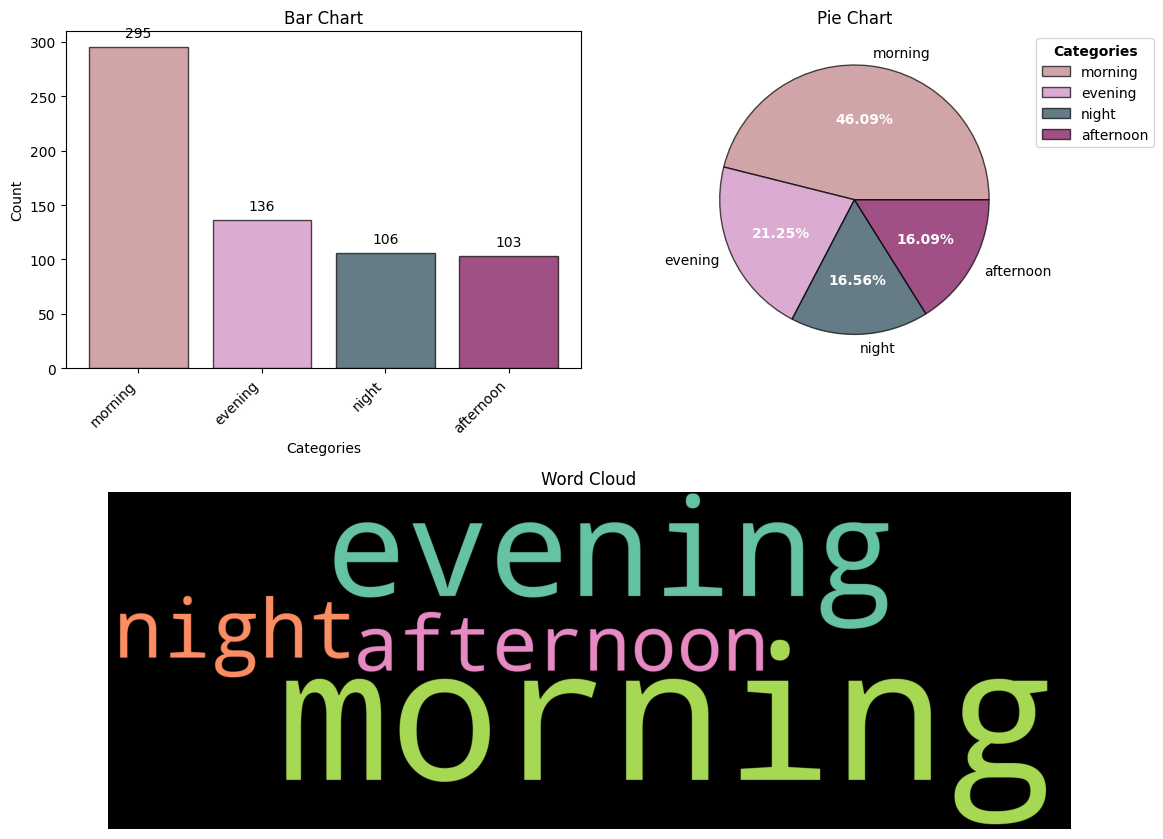

In [27]:
(
    train
    .assign(dep_time=lambda df_:(
         np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                    df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                    df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                    ['morning',
                    'afternoon',
                    'evening'],
                    default='night')
    ))
    .pipe(eda_helper_functions.cat_univar_plots,'dep_time')
)

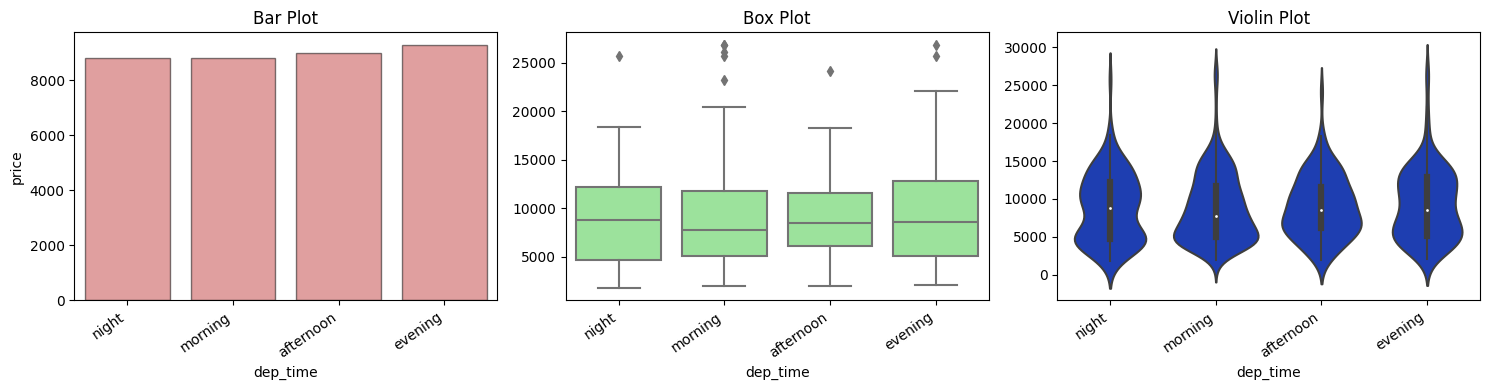

In [28]:
(
    train
    .assign(dep_time=lambda df_:(
         np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                    df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                    df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                    ['morning',
                    'afternoon',
                    'evening'],
                    default='night')
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')
)

### 8.4 duration

In [29]:
train.duration

0      845
1      335
2      185
3      170
4      590
      ... 
635    155
636    805
637    590
638    830
639    475
Name: duration, Length: 640, dtype: int64

In [30]:
eda_helper_functions.num_summary(train,'duration')

0      845
1      335
2      185
3      170
4      590
      ... 
635    155
636    805
637    590
638    830
639    475
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,507.50
75,930.00
90,1475.50
95,1590.25
99,1845.25


,value
mean,641.148438
trimmed mean (5%),608.003472
trimmed mean (10%),579.804688
median,507.500000


,value
var,265390.658683
std,515.160809
IQR,760.000000
mad,342.500000
coef_variance,0.803497


,value
skewness,0.861482
kurtosis,-0.210342


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.0869775249993332e-21
Test Statistic       : 0.881606936454773
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.527067970633766
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [31]:
train.duration.quantile([0.25,0.50,0.75])

0.25    170.0
0.50    507.5
0.75    930.0
Name: duration, dtype: float64

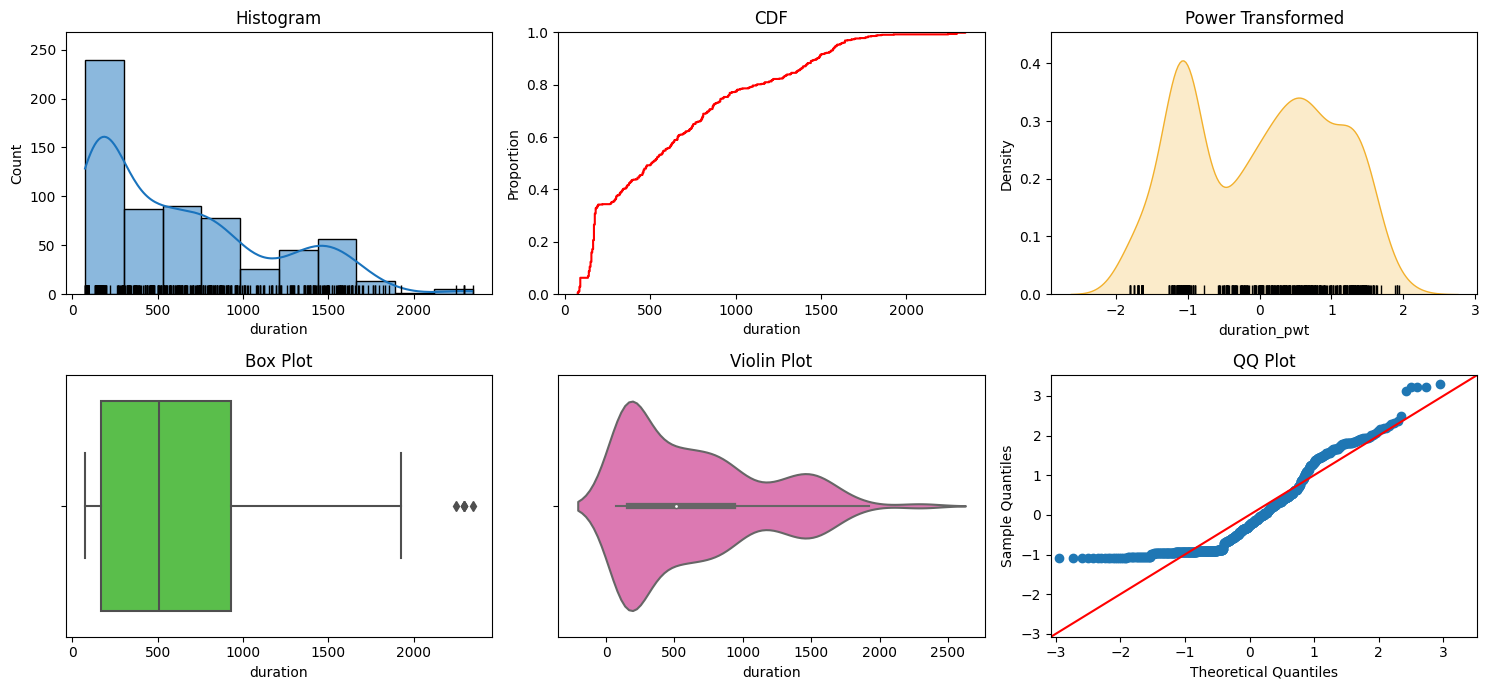

In [32]:
eda_helper_functions.num_univar_plots(train,'duration')

In [37]:
# eda_helper_functions.num_bivar_plots(
#     train,
#     'duration',
#     'price'
# )

In [34]:
eda_helper_functions.num_num_hyp_testing(train,'price','duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5369587844177153
- p-value              : 4.422585985101177e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6976367251294197
- p-value              : 1.8376397371947915e-94
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


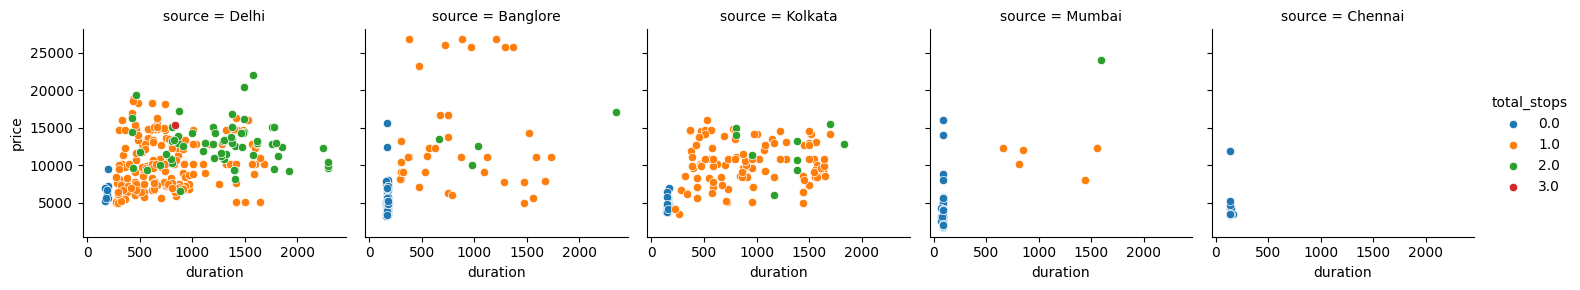

In [35]:
duration_grid = sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')

duration_grid.add_legend()

### 9. Automated EDA